<a href="https://colab.research.google.com/github/Hemn-Khdr/intro-ml-course-winter2025/blob/main/Hemn_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()  # This will open a file chooser. Select your Stroke.csv file.



Saving Stroke_subset.csv to Stroke_subset.csv


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

The course dataset provides me with multiple medical records of patients, with a dummy outcome variable representing the presence (1) or absence (0) of stroke.

The main goal of using Logistic Regression is to predict the likelihood of a person experiencing a stroke based on their medical records. Specifically, I aim to create a classifier that accurately predicts my outcome variable, which is stroke (yes or no), while using the remaining columns as features. This paper may help doctors identify patients at risk of stroke earlier, thereby facilitating early intervention to prevent this serious health condition.

Our dataset contains many variables representing multiple physical and mental health measurements, including:


Depression: Indicator of whether the patient has been diagnosed with depression

*  Age_at_Exam: Age of the patient at the time of the exam.
*  Sex: Sex of the patient (e.g., Male, Female).
*   sBP: Systolic blood pressure.
*   sBP_Date: Date of the systolic blood pressure measurement.
*   BMI: Body Mass Index.
*   LDL: Low-Density Lipoprotein (bad cholesterol).
*  HDL: High-Density Lipoprotein (good cholesterol).
*  [Stroke]: Indicator of whether the patient had a stroke (1 = Yes, 0 = No).
*  [Stroke_Date]: Date when the stroke occurred.
*  Depression: Indicator of whether the patient has been diagnosed with depression (1 = Yes, 0 = No).
* Depression_OnsetDate: Date when depression was diagnosed.
* [Anxiety]: Presence of anxiety (Yes/No).
* [Anxiety_Date]: Date of anxiety diagnosis.
* HTN: Presence of hypertension (Yes/No).
* HTN_OnsetDate: Date of hypertension



In [74]:
import pandas as pd
df = pd.read_csv('Stroke_subset.csv')
df.head()

,Age_at_Exam,Sex,sBP,BMI,LDL,HDL,[Stroke),[Stroke_Date],Depression,Depression_OnsetDate,[Anxiety),[Anxiety_Date],HTN,HTN_OnsetDate
0,69,Male,140.0,26.000000,3.35,1.03,NaN,NaN,0,NaN,NaN,NaN,1,2009-11-13
1,56,Female,120.0,24.000000,4.01,1.84,NaN,NaN,0,NaN,NaN,NaN,0,NaN
2,35,Female,100.0,51.195667,3.11,1.26,NaN,NaN,0,NaN,NaN,NaN,0,NaN
3,43,Female,138.0,67.794421,2.96,1.09,NaN,NaN,0,NaN,NaN,NaN,0,NaN
4,49,Male,141.0,34.000000,4.06,1.34,NaN,NaN,0,NaN,NaN,NaN,1,2010-07-12


In [75]:
# Dropping the date-related columns, in this stage on my analysisi I ma not focusing on date of occurance of the events. So, I am dropping them for now.

date_columns_to_drop = ['[Stroke_Date]', 'Depression_OnsetDate', '[Anxiety_Date]', 'HTN_OnsetDate']

# Drop the columns if they exist in the DataFrame
df.drop(columns=[col for col in date_columns_to_drop if col in df.columns], inplace=True)

# Display the updated list of columns to confirm
df.columns.tolist()


['Age_at_Exam',
 'Sex',
 'sBP',
 'BMI',
 'LDL',
 'HDL',
 '[Stroke)',
 'Depression',
 '[Anxiety)',
 'HTN']

In [76]:
df['Sex'] = df['Sex'].astype(str).str.strip()  # Convert to string and remove spaces
print(df['Sex'].unique())  # Check again

df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})


['Male' 'Female']


In [77]:


# Display the updated list of columns to confirm
df.columns.tolist()



# Display summary statistics
print(df.describe())

         Age_at_Exam            Sex            sBP            BMI  \
count  808921.000000  808921.000000  808161.000000  808921.000000   
mean       60.661937       0.583336     129.335292      29.709366   
std        14.062109       0.493006      17.142063       7.049516   
min        18.000000       0.000000      40.000000       5.080655   
25%        51.000000       0.000000     119.000000      25.200000   
50%        61.000000       1.000000     129.000000      28.600000   
75%        71.000000       1.000000     140.000000      32.800000   
max        90.000000       1.000000     260.000000     240.086698   

                 LDL            HDL       [Stroke)     Depression  \
count  803729.000000  800702.000000  102736.000000  808921.000000   
mean        2.835181       1.388132       0.054470       0.210880   
std         0.989493       0.415248       0.226943       0.407933   
min         0.100000       0.100000       0.000000       0.000000   
25%         2.100000       1.1000

In [78]:
# Check for missing values in each column
print(df.isna().sum())

Age_at_Exam         0
Sex                 0
sBP               760
BMI                 0
LDL              5192
HDL              8219
[Stroke)       706185
Depression          0
[Anxiety)      706185
HTN                 0
dtype: int64


In [82]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)



for col in ['sBP', 'LDL', 'HDL']:
    df[col] = df[col].fillna(df[col].median())
print(df.isnull().sum())  # Should print 0 for all columns

# Display summary statistics
print(df.describe())


missing_overlap = df[df["[Stroke)"].isnull() & df["[Anxiety)"].isnull()]
print(f"Number of rows where both [Stroke) and [Anxiety) are missing: {len(missing_overlap)}")



Age_at_Exam    0.0
Sex            0.0
sBP            0.0
BMI            0.0
LDL            0.0
HDL            0.0
[Stroke)       0.0
Depression     0.0
[Anxiety)      0.0
HTN            0.0
dtype: float64
Age_at_Exam    0
Sex            0
sBP            0
BMI            0
LDL            0
HDL            0
[Stroke)       0
Depression     0
[Anxiety)      0
HTN            0
dtype: int64
         Age_at_Exam            Sex            sBP            BMI  \
count  808921.000000  808921.000000  808921.000000  808921.000000   
mean       60.661937       0.583336     129.334977      29.709366   
std        14.062109       0.493006      17.134011       7.049516   
min        18.000000       0.000000      40.000000       5.080655   
25%        51.000000       0.000000     119.000000      25.200000   
50%        61.000000       1.000000     129.000000      28.600000   
75%        71.000000       1.000000     140.000000      32.800000   
max        90.000000       1.000000     260.000000     240.0

In [83]:
print(df[['[Stroke)', '[Anxiety)']].isnull().sum(axis=1).value_counts())


0    808921
Name: count, dtype: int64


Interpretation
706,185 rows have both [Stroke) and [Anxiety) missing (2 missing values per row).
→ These patients were not recorded for stroke or anxiety (likely because they never had these conditions).
102,736 rows have neither [Stroke) nor [Anxiety) missing (0 missing values per row).
→ These patients have recorded values for both stroke and anxiety.
The dataset only records stroke and anxiety for a subset of patients (likely those diagnosed with at least one of these conditions).
Missing values in [Stroke) and [Anxiety) do not indicate errors but instead mean "no recorded event."
We cannot assume these patients never had stroke or anxiety—only that there is no record.

In [108]:

# Replace missing values with -1 to indicate "no recorded event"
df['[Stroke)'] = df['[Stroke)'].fillna(0)
df['[Anxiety)'] = df['[Anxiety)'].fillna(-1)

# Confirm no missing values remain
print(df.isnull().sum())  # Should print 0 for all columns


Age_at_Exam    0
Sex            0
sBP            0
BMI            0
LDL            0
HDL            0
[Stroke)       0
Depression     0
[Anxiety)      0
HTN            0
dtype: int64


In [97]:
# Split the data into features and target variable
X = df.drop('[Stroke)', axis=1)
y = df['[Stroke)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set


In [98]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(solver='liblinear')

In [99]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[141283      0      0]
 [     0  19350      0]
 [     0   1152      0]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00    141283
         0.0       0.94      1.00      0.97     19350
         1.0       0.00      0.00      0.00      1152

    accuracy                           0.99    161785
   macro avg       0.65      0.67      0.66    161785
weighted avg       0.99      0.99      0.99    161785



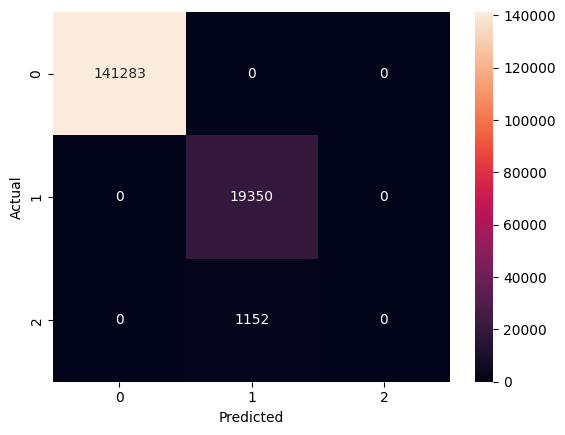

In [100]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [103]:
# Define predictors (features) for stroke prediction
predictors = ['Age_at_Exam', 'Sex', 'sBP', 'BMI', 'LDL', 'HDL', 'Depression', 'HTN', '[Anxiety)']

# Define the target variable (stroke outcome)
target = '[Stroke)'

# Select feature matrix (X) and target variable (y)
X = df[predictors]
y = df[target]


In [104]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [105]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

🔹 Logistic Regression Performance 🔹
✅ Accuracy: 89.27%
✅ AUC: 0.95

📊 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    240998
         1.0       0.06      0.96      0.11      1679

    accuracy                           0.89    242677
   macro avg       0.53      0.93      0.53    242677
weighted avg       0.99      0.89      0.94    242677



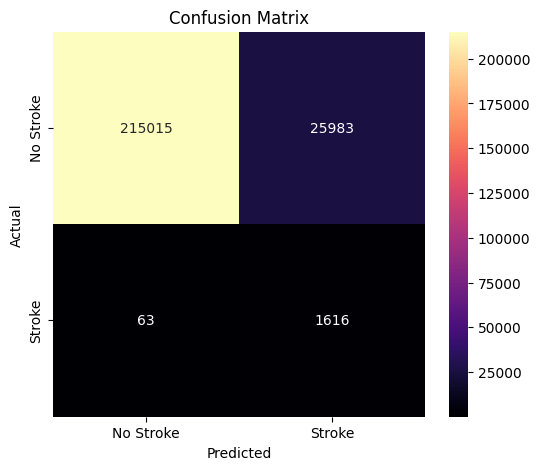

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target: -1.0 → 0.0
y = y.replace(-1, 0)

# Split dataset into train and test sets (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ✅ Normalizing data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform on training set
X_test = scaler.transform(X_test)        # Transform test set

# Train Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("🔹 Logistic Regression Performance 🔹")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"✅ AUC: {auc:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [115]:
print(y.unique())  # Should only show [0, 1]


[-1.  0.  1.]


In [116]:
# Replace -1 with 0 in the target variable y
y = y.replace(-1, 0)

# Verify that y only contains 0 and 1
print("Unique values in y:", y.unique())  # Should print: [0, 1]

# Drop any NaN values in y and ensure X matches its indices
y = y.dropna()
X = X.loc[y.index]

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())  # Should be 0
print("Missing values in y:", y.isnull().sum())        # Should be 0

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Display summary
log_reg.summary()


Unique values in y: [0. 1.]
Missing values in X: 0
Missing values in y: 0
Optimization terminated successfully.
         Current function value: 0.029599
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               [Stroke)   No. Observations:               808921
Model:                          Logit   Df Residuals:                   808911
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Feb 2025   Pseudo R-squ.:                  0.2833
Time:                        20:19:04   Log-Likelihood:                -23943.
converged:                       True   LL-Null:                       -33409.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.8610      0.176    -33.313      0.000      -6.206      -5.516
Age_at_Exam     0.0690      0.001     51.272      0.000       0.066       0.072
Sex            -0.1703      0.031     -5.494      0.000      -0.231      -0.110
sBP            -0.0021      0.001     -2.460      0.014      -0.004      -0.000
BMI            -0.0371      0.003    -13.314      0.000      -0.043      -0.032
LDL            -0.2599      0.017    -15.748      0.000      -0.292      -0.228
HDL            -0.8059      0.042    -19.248      0.000      -0.888      -0.724
Depression     -0.0432      0.034     -1.289      0.197      -0.109       0.022
[Anxiety)       2.0160      0.018    114.580      0.000       1.982       2.051
HTN             0.3628      0.036     10.208      0.000       0.293       0.432
===============================================================================
"""

🔹 Logistic Regression Performance 🔹
✅ Accuracy: 89.27%
✅ AUC: 0.95

📊 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94    240998
         1.0       0.06      0.96      0.11      1679

    accuracy                           0.89    242677
   macro avg       0.53      0.93      0.53    242677
weighted avg       0.99      0.89      0.94    242677



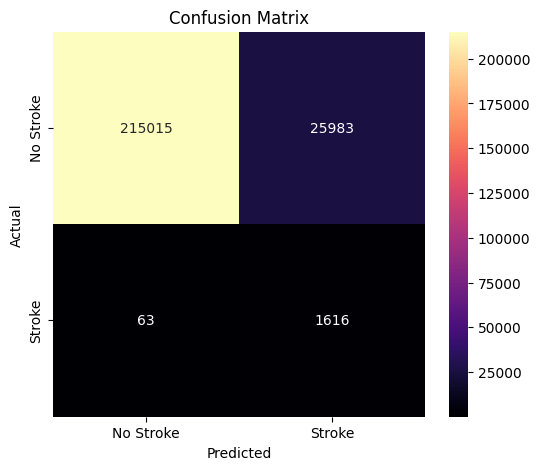

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert target: -1.0 → 0.0
y = y.replace(-1, 0)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Maintain class balance
)

# Train Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("🔹 Logistic Regression Performance 🔹")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print(f"✅ AUC: {auc:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


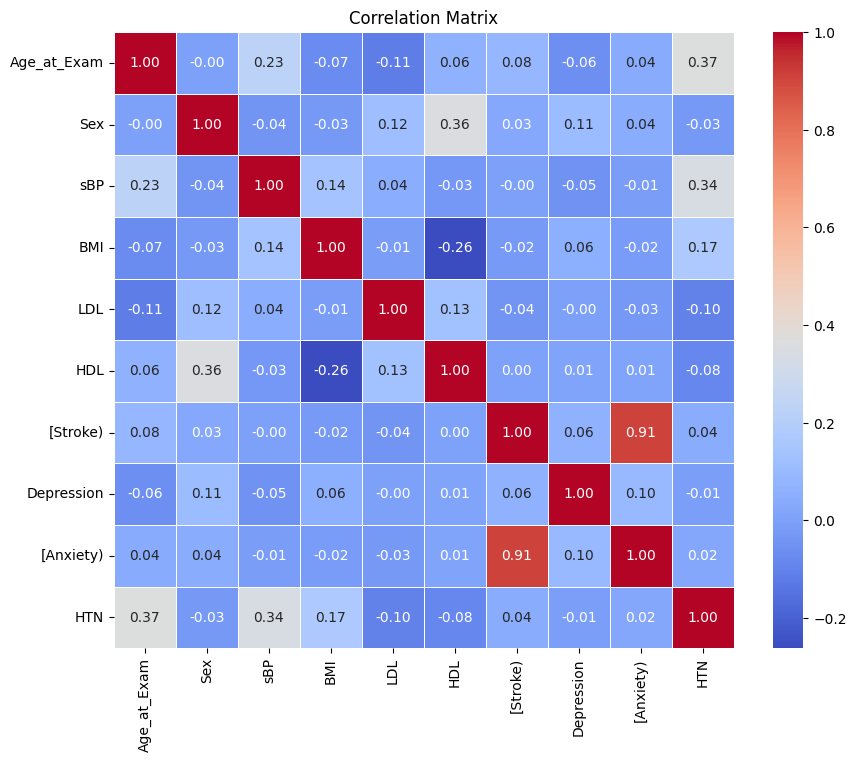

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display summary statistics
summary_stats = df.describe()

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#

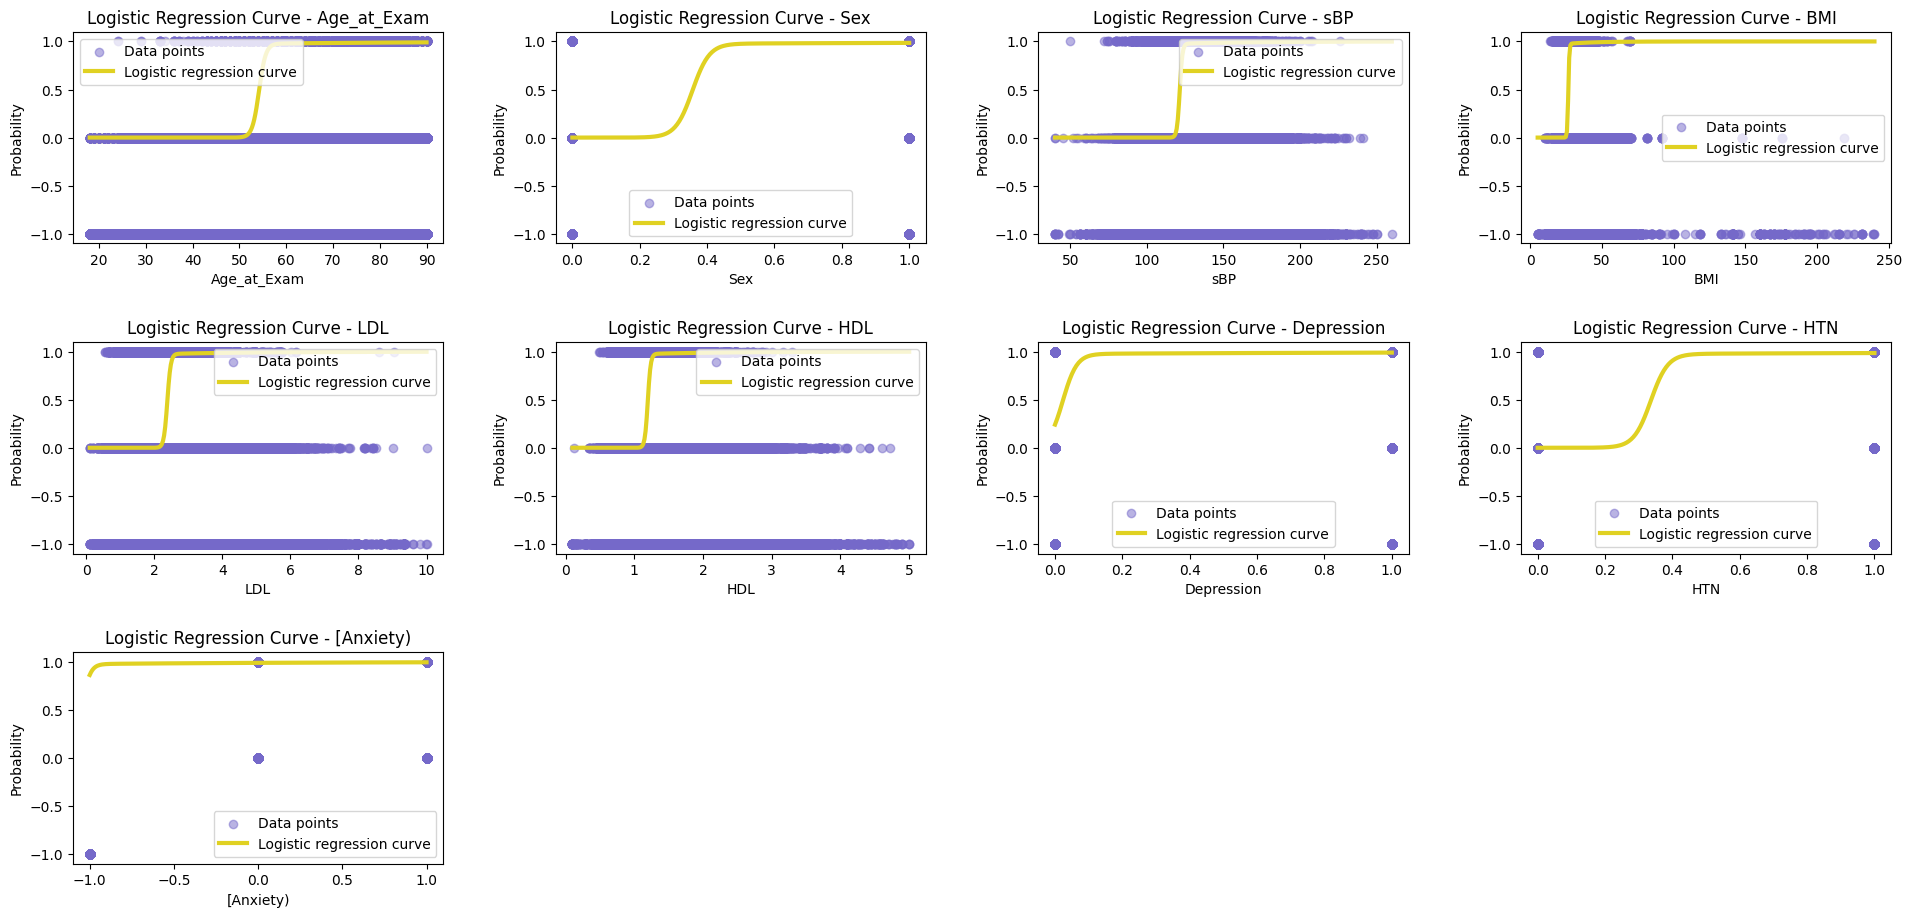

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define features and target
features = ['Age_at_Exam', 'Sex', 'sBP', 'BMI', 'LDL', 'HDL', 'Depression', 'HTN', '[Anxiety)']
target = '[Stroke)'

X = df[features]
y = df[target]

# Standardize features to improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Create subplots dynamically based on the number of features
n_cols = 4  # Number of columns in the subplot grid
n_rows = int(np.ceil(len(features) / n_cols))  # Calculate required rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

# Flatten axs array to avoid indexing issues
axs = axs.flatten()

for i, feature in enumerate(features):
    X_feature = df[[feature]].values  # Extract a single feature column

    # Create a new scaler for each individual feature
    feature_scaler = StandardScaler()
    X_scaled_feature = feature_scaler.fit_transform(X_feature)  # Scale the feature

    # Generate test values for the feature within its range
    x_test = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)
    x_test_scaled = feature_scaler.transform(x_test)  # Scale test values

    # Predict probabilities using logistic regression model
    prob = log_reg.predict_proba(scaler.transform(np.tile(x_test_scaled, (1, X_scaled.shape[1]))))[:, 1]

    # Plot data points
    axs[i].scatter(X_feature, y, color='#7569c9', alpha=0.5, label='Data points')

    # Plot the logistic regression curve
    axs[i].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve')

    axs[i].set_title(f'Logistic Regression Curve - {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Probability')
    axs[i].legend()

# Hide any unused subplot spaces
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()
